In [7]:
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
import numpy as np

In [8]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [ ]:
iv3 = InceptionV3()

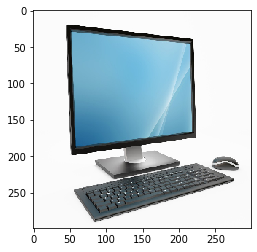

In [12]:
from keras.preprocessing import image

# Cargamos la imagen a la que queremos aplicar el ataque adversario desde su ubicación y la guardamos en formato array en x
x = image.img_to_array(image.load_img("./Personal-computer.png", target_size = (299,299)))

plt.imshow(x.astype(np.uint8))
plt.show()

In [13]:
# Cambio de rango 0-255 --> (-1)-1. Para que el modelo sea capaz de ejecutarlo
x /= 255
x -= 0.5
x *= 2

# El modelo permite meter más de una imagen pasandole un solo array. 
# Hay que añadirle una dimensión más especificando el numero de fotos que contiene el arrayle, en este caso 1
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

# Le pasamos la foto al modelo y guardamos el resultado en y 
y = iv3.predict(x)

In [14]:
decode_predictions(y)

[[('n03180011', 'desktop_computer', 0.9483315),
  ('n03085013', 'computer_keyboard', 0.0060747894),
  ('n03782006', 'monitor', 0.005744197),
  ('n03179701', 'desk', 0.0051767924),
  ('n03793489', 'mouse', 0.0040734825)]]

In [19]:
# Ataque Adversario:

In [36]:
# Sacamos el nodo de entrada y salida del modelo para poder jugar con ellos
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

# Queremos que el modelo se confunda con un caña, maximizando la probabilidad de la posicion 441; la referente a la caña
target_class = 441

# Nos quedamos con la probabilidad de la clase caña para maximizarlo; sera nuestra funcion de costes
loss = output_layer[0, target_class]

# EL gradiante en vez de usarse para reajustar los parametros del modelo, como se haria para entrenarlo, lo usaremos para modificar los pixeles de la imagen de entrada
grad = K.gradients(loss, input_layer)[0]

# Crearemos esta funcion para poder iterar el calculo del gradiante en un bucle y poder sumarlo a la foto
optimize_gradient = K.function([input_layer,K.learning_phase()], [grad, loss])

adv = np.copy(x)

cost = 0.0

while cost < 0.95:
    
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr
    
    print("Beer cost: ", cost)
    

Beer cost:  1.2954532e-05
Beer cost:  1.2963408e-05
Beer cost:  1.2973108e-05
Beer cost:  1.2983582e-05
Beer cost:  1.29941745e-05
Beer cost:  1.300492e-05
Beer cost:  1.3015822e-05
Beer cost:  1.3026789e-05
Beer cost:  1.30377475e-05
Beer cost:  1.3048574e-05
Beer cost:  1.3059434e-05
Beer cost:  1.307038e-05
Beer cost:  1.3081317e-05
Beer cost:  1.3092272e-05
Beer cost:  1.3103282e-05
Beer cost:  1.3114203e-05
Beer cost:  1.3125237e-05
Beer cost:  1.3136263e-05
Beer cost:  1.314735e-05
Beer cost:  1.3158628e-05
Beer cost:  1.3169782e-05
Beer cost:  1.3180939e-05
Beer cost:  1.3192152e-05
Beer cost:  1.3203239e-05
Beer cost:  1.3214167e-05
Beer cost:  1.3225215e-05
Beer cost:  1.3236204e-05
Beer cost:  1.3247244e-05
Beer cost:  1.32582e-05
Beer cost:  1.326911e-05
Beer cost:  1.3279994e-05
Beer cost:  1.3290857e-05
Beer cost:  1.3301857e-05
Beer cost:  1.3312842e-05
Beer cost:  1.3323759e-05
Beer cost:  1.3334682e-05
Beer cost:  1.3345503e-05
Beer cost:  1.3356311e-05
Beer cost:  1.33

Beer cost:  1.6619382e-05
Beer cost:  1.6632468e-05
Beer cost:  1.6645688e-05
Beer cost:  1.6658863e-05
Beer cost:  1.6672322e-05
Beer cost:  1.6685564e-05
Beer cost:  1.6698841e-05
Beer cost:  1.6712182e-05
Beer cost:  1.672547e-05
Beer cost:  1.6738855e-05
Beer cost:  1.6752238e-05
Beer cost:  1.676564e-05
Beer cost:  1.677901e-05
Beer cost:  1.6792532e-05
Beer cost:  1.6806021e-05
Beer cost:  1.6819542e-05
Beer cost:  1.6833066e-05
Beer cost:  1.684662e-05
Beer cost:  1.6860182e-05
Beer cost:  1.6873906e-05
Beer cost:  1.688754e-05
Beer cost:  1.6901226e-05
Beer cost:  1.6914797e-05
Beer cost:  1.6928481e-05
Beer cost:  1.6942065e-05
Beer cost:  1.6955853e-05
Beer cost:  1.6969778e-05
Beer cost:  1.6983617e-05
Beer cost:  1.6997483e-05
Beer cost:  1.7011538e-05
Beer cost:  1.7025568e-05
Beer cost:  1.703957e-05
Beer cost:  1.7053675e-05
Beer cost:  1.7067918e-05
Beer cost:  1.7082113e-05
Beer cost:  1.7096345e-05
Beer cost:  1.7110502e-05
Beer cost:  1.7124816e-05
Beer cost:  1.7138

Beer cost:  2.174724e-05
Beer cost:  2.1766493e-05
Beer cost:  2.1785741e-05
Beer cost:  2.1805177e-05
Beer cost:  2.1824755e-05
Beer cost:  2.1844206e-05
Beer cost:  2.186395e-05
Beer cost:  2.1883805e-05
Beer cost:  2.1903714e-05
Beer cost:  2.1923574e-05
Beer cost:  2.1943539e-05
Beer cost:  2.1963222e-05
Beer cost:  2.1983058e-05
Beer cost:  2.2002967e-05
Beer cost:  2.2023063e-05
Beer cost:  2.204298e-05
Beer cost:  2.2063106e-05
Beer cost:  2.2083153e-05
Beer cost:  2.210298e-05
Beer cost:  2.2122942e-05
Beer cost:  2.2142754e-05
Beer cost:  2.2163134e-05
Beer cost:  2.2183287e-05
Beer cost:  2.2203802e-05
Beer cost:  2.2224247e-05
Beer cost:  2.224465e-05
Beer cost:  2.2265125e-05
Beer cost:  2.2285589e-05
Beer cost:  2.2305947e-05
Beer cost:  2.2326294e-05
Beer cost:  2.2346687e-05
Beer cost:  2.2367216e-05
Beer cost:  2.238767e-05
Beer cost:  2.2408381e-05
Beer cost:  2.2429154e-05
Beer cost:  2.2449925e-05
Beer cost:  2.2470898e-05
Beer cost:  2.2491837e-05
Beer cost:  2.2512

Beer cost:  2.9828218e-05
Beer cost:  2.9859286e-05
Beer cost:  2.9890358e-05
Beer cost:  2.9921464e-05
Beer cost:  2.9952667e-05
Beer cost:  2.998432e-05
Beer cost:  3.0015859e-05
Beer cost:  3.0047107e-05
Beer cost:  3.0078907e-05
Beer cost:  3.0110752e-05
Beer cost:  3.0142508e-05
Beer cost:  3.0174375e-05
Beer cost:  3.0206234e-05
Beer cost:  3.023816e-05
Beer cost:  3.027028e-05
Beer cost:  3.0302246e-05
Beer cost:  3.0334422e-05
Beer cost:  3.0366526e-05
Beer cost:  3.0398454e-05
Beer cost:  3.0430418e-05
Beer cost:  3.0462512e-05
Beer cost:  3.0494532e-05
Beer cost:  3.0526644e-05
Beer cost:  3.055889e-05
Beer cost:  3.059121e-05
Beer cost:  3.062367e-05
Beer cost:  3.065609e-05
Beer cost:  3.068869e-05
Beer cost:  3.0721432e-05
Beer cost:  3.0753934e-05
Beer cost:  3.0786458e-05
Beer cost:  3.0819116e-05
Beer cost:  3.0851672e-05
Beer cost:  3.0883966e-05
Beer cost:  3.0916428e-05
Beer cost:  3.0949133e-05
Beer cost:  3.0982206e-05
Beer cost:  3.101509e-05
Beer cost:  3.1047908

Beer cost:  4.2719203e-05
Beer cost:  4.2772826e-05
Beer cost:  4.2826803e-05
Beer cost:  4.288092e-05
Beer cost:  4.293507e-05
Beer cost:  4.298921e-05
Beer cost:  4.3044085e-05
Beer cost:  4.3099037e-05
Beer cost:  4.3153872e-05
Beer cost:  4.3208765e-05
Beer cost:  4.3263753e-05
Beer cost:  4.33187e-05
Beer cost:  4.3374115e-05
Beer cost:  4.3429776e-05
Beer cost:  4.348516e-05
Beer cost:  4.3541255e-05
Beer cost:  4.359702e-05
Beer cost:  4.3652017e-05
Beer cost:  4.3707194e-05
Beer cost:  4.3762157e-05
Beer cost:  4.3817636e-05
Beer cost:  4.3873097e-05
Beer cost:  4.39288e-05
Beer cost:  4.398491e-05
Beer cost:  4.404123e-05
Beer cost:  4.409734e-05
Beer cost:  4.4154e-05
Beer cost:  4.4210687e-05
Beer cost:  4.426689e-05
Beer cost:  4.4323497e-05
Beer cost:  4.438029e-05
Beer cost:  4.4437493e-05
Beer cost:  4.4494685e-05
Beer cost:  4.4551864e-05
Beer cost:  4.4608718e-05
Beer cost:  4.466516e-05
Beer cost:  4.4722405e-05
Beer cost:  4.477932e-05
Beer cost:  4.4836364e-05
Beer 

Beer cost:  6.783204e-05
Beer cost:  6.794398e-05
Beer cost:  6.805497e-05
Beer cost:  6.8166206e-05
Beer cost:  6.827785e-05
Beer cost:  6.8389425e-05
Beer cost:  6.850016e-05
Beer cost:  6.861109e-05
Beer cost:  6.872214e-05
Beer cost:  6.883413e-05
Beer cost:  6.894603e-05
Beer cost:  6.9059555e-05
Beer cost:  6.9172675e-05
Beer cost:  6.9286594e-05
Beer cost:  6.9400776e-05
Beer cost:  6.951536e-05
Beer cost:  6.9631e-05
Beer cost:  6.974669e-05
Beer cost:  6.98636e-05
Beer cost:  6.99812e-05
Beer cost:  7.009888e-05
Beer cost:  7.021588e-05
Beer cost:  7.03324e-05
Beer cost:  7.04497e-05
Beer cost:  7.056683e-05
Beer cost:  7.068492e-05
Beer cost:  7.0802584e-05
Beer cost:  7.092012e-05
Beer cost:  7.103884e-05
Beer cost:  7.115897e-05
Beer cost:  7.127857e-05
Beer cost:  7.140012e-05
Beer cost:  7.152198e-05
Beer cost:  7.1644536e-05
Beer cost:  7.1768125e-05
Beer cost:  7.1891445e-05
Beer cost:  7.2014365e-05
Beer cost:  7.213705e-05
Beer cost:  7.225847e-05
Beer cost:  7.237958

Beer cost:  0.00012660744
Beer cost:  0.00012690348
Beer cost:  0.00012719983
Beer cost:  0.00012749735
Beer cost:  0.0001277923
Beer cost:  0.00012808936
Beer cost:  0.00012838852
Beer cost:  0.00012868742
Beer cost:  0.00012898666
Beer cost:  0.00012928726
Beer cost:  0.00012958917
Beer cost:  0.00012989114
Beer cost:  0.0001301911
Beer cost:  0.00013049097
Beer cost:  0.00013078423
Beer cost:  0.00013107802
Beer cost:  0.00013137617
Beer cost:  0.00013167296
Beer cost:  0.00013197438
Beer cost:  0.00013227561
Beer cost:  0.00013257767
Beer cost:  0.00013287828
Beer cost:  0.00013317703
Beer cost:  0.00013347635
Beer cost:  0.00013377753
Beer cost:  0.00013407889
Beer cost:  0.00013438509
Beer cost:  0.0001346936
Beer cost:  0.00013500708
Beer cost:  0.00013532038
Beer cost:  0.00013563983
Beer cost:  0.00013595776
Beer cost:  0.00013627841
Beer cost:  0.00013660121
Beer cost:  0.0001369294
Beer cost:  0.00013725553
Beer cost:  0.00013757842
Beer cost:  0.00013789999
Beer cost:  0.00

Beer cost:  0.0002675167
Beer cost:  0.00026816595
Beer cost:  0.00026881907
Beer cost:  0.00026947996
Beer cost:  0.00027014886
Beer cost:  0.00027082584
Beer cost:  0.00027150713
Beer cost:  0.00027218892
Beer cost:  0.0002728672
Beer cost:  0.0002735435
Beer cost:  0.00027421568
Beer cost:  0.00027490084
Beer cost:  0.0002755849
Beer cost:  0.0002762687
Beer cost:  0.00027695514
Beer cost:  0.00027765014
Beer cost:  0.0002783492
Beer cost:  0.00027905108
Beer cost:  0.00027975347
Beer cost:  0.00028045767
Beer cost:  0.00028116142
Beer cost:  0.00028186667
Beer cost:  0.00028257805
Beer cost:  0.00028329593
Beer cost:  0.00028401677
Beer cost:  0.0002847366
Beer cost:  0.0002854615
Beer cost:  0.00028618367
Beer cost:  0.00028690908
Beer cost:  0.0002876391
Beer cost:  0.000288368
Beer cost:  0.00028909714
Beer cost:  0.00028982398
Beer cost:  0.00029055483
Beer cost:  0.0002912864
Beer cost:  0.00029201544
Beer cost:  0.00029273672
Beer cost:  0.00029345707
Beer cost:  0.0002941802

Beer cost:  0.000642767
Beer cost:  0.00064463215
Beer cost:  0.000646525
Beer cost:  0.0006484538
Beer cost:  0.00065037573
Beer cost:  0.00065226364
Beer cost:  0.0006542012
Beer cost:  0.0006561338
Beer cost:  0.0006580687
Beer cost:  0.00066001184
Beer cost:  0.0006618932
Beer cost:  0.0006637609
Beer cost:  0.0006656428
Beer cost:  0.0006675313
Beer cost:  0.0006694081
Beer cost:  0.0006712534
Beer cost:  0.000673142
Beer cost:  0.00067503774
Beer cost:  0.0006769047
Beer cost:  0.0006788036
Beer cost:  0.00068065344
Beer cost:  0.00068251725
Beer cost:  0.00068438705
Beer cost:  0.00068627344
Beer cost:  0.000688188
Beer cost:  0.0006901179
Beer cost:  0.0006920449
Beer cost:  0.0006939759
Beer cost:  0.0006959211
Beer cost:  0.0006978683
Beer cost:  0.0006998372
Beer cost:  0.00070177997
Beer cost:  0.0007037729
Beer cost:  0.00070574746
Beer cost:  0.0007077215
Beer cost:  0.0007097121
Beer cost:  0.0007117161
Beer cost:  0.000713725
Beer cost:  0.0007157234
Beer cost:  0.00071

Beer cost:  0.001692289
Beer cost:  0.0016984867
Beer cost:  0.0017047238
Beer cost:  0.0017104943
Beer cost:  0.0017169024
Beer cost:  0.0017229877
Beer cost:  0.0017292318
Beer cost:  0.0017352195
Beer cost:  0.001741575
Beer cost:  0.001747521
Beer cost:  0.0017539115
Beer cost:  0.0017596786
Beer cost:  0.0017660846
Beer cost:  0.0017721684
Beer cost:  0.0017793992
Beer cost:  0.0017862847
Beer cost:  0.0017936488
Beer cost:  0.0018005102
Beer cost:  0.0018069082
Beer cost:  0.0018128987
Beer cost:  0.0018202765
Beer cost:  0.0018262123
Beer cost:  0.001834302
Beer cost:  0.001840797
Beer cost:  0.0018480131
Beer cost:  0.0018539996
Beer cost:  0.0018611888
Beer cost:  0.0018672256
Beer cost:  0.0018749413
Beer cost:  0.001881948
Beer cost:  0.0018893365
Beer cost:  0.0018960962
Beer cost:  0.0019030536
Beer cost:  0.0019102169
Beer cost:  0.0019175026
Beer cost:  0.001923771
Beer cost:  0.001931088
Beer cost:  0.0019376777
Beer cost:  0.0019446092
Beer cost:  0.0019508776
Beer cos

In [49]:
adv /= 2
adv += 0.5
adv *= 255

print(adv.shape)

(1, 299, 299, 3)


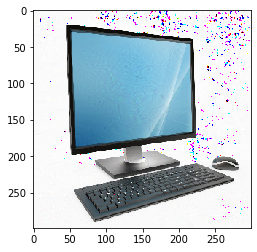

In [38]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [39]:
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

target_class = 441

loss = output_layer[0, target_class]

grad = K.gradients(loss, input_layer)[0]

optimize_gradient = K.function([input_layer,K.learning_phase()], [grad, loss])

adv1 = np.copy(x)

# Como queremos que el cambio en los pixels no sea apreciable por el ojo humano definimos las siguientes variables
perturbacion = 0.01

min_pert = x - perturbacion
max_pert = x + perturbacion

cost = 0.0

while cost < 0.95:
    
    gr, cost = optimize_gradient([adv1, 0])
    
    adv1 += gr
    # Aplicamos los minimos y maximos calculados. Si el cambio es superior al maximo, cogera el valor maximo. Lo mismo con el minimo
    adv1 = np.clip(adv1, min_pert, max_pert)
    adv1 = np.clip(adv1, -1, 1)
    
    print("Beer cost: ", cost)

Beer cost:  1.2954532e-05
Beer cost:  1.2963384e-05
Beer cost:  1.2973095e-05
Beer cost:  1.2983569e-05
Beer cost:  1.2994186e-05
Beer cost:  1.3004908e-05
Beer cost:  1.30158105e-05
Beer cost:  1.3026776e-05
Beer cost:  1.303776e-05
Beer cost:  1.3048539e-05
Beer cost:  1.30593735e-05
Beer cost:  1.3070392e-05
Beer cost:  1.3081319e-05
Beer cost:  1.3092246e-05
Beer cost:  1.3103247e-05
Beer cost:  1.3114179e-05
Beer cost:  1.3125201e-05
Beer cost:  1.3136239e-05
Beer cost:  1.3147338e-05
Beer cost:  1.3158592e-05
Beer cost:  1.3169696e-05
Beer cost:  1.3180856e-05
Beer cost:  1.3192092e-05
Beer cost:  1.3203166e-05
Beer cost:  1.3214167e-05
Beer cost:  1.322519e-05
Beer cost:  1.3236228e-05
Beer cost:  1.324721e-05
Beer cost:  1.3258178e-05
Beer cost:  1.326901e-05
Beer cost:  1.3279945e-05
Beer cost:  1.3290799e-05
Beer cost:  1.33017575e-05
Beer cost:  1.3312757e-05
Beer cost:  1.3323686e-05
Beer cost:  1.3334671e-05
Beer cost:  1.33454305e-05
Beer cost:  1.3356311e-05
Beer cost:  

Beer cost:  1.6620314e-05
Beer cost:  1.6633512e-05
Beer cost:  1.6646622e-05
Beer cost:  1.665983e-05
Beer cost:  1.6672991e-05
Beer cost:  1.6686261e-05
Beer cost:  1.6699521e-05
Beer cost:  1.6712953e-05
Beer cost:  1.6726253e-05
Beer cost:  1.6739583e-05
Beer cost:  1.6753018e-05
Beer cost:  1.6766357e-05
Beer cost:  1.6779755e-05
Beer cost:  1.6793234e-05
Beer cost:  1.6806742e-05
Beer cost:  1.6820291e-05
Beer cost:  1.6833877e-05
Beer cost:  1.6847433e-05
Beer cost:  1.6860993e-05
Beer cost:  1.6874761e-05
Beer cost:  1.6888402e-05
Beer cost:  1.6902086e-05
Beer cost:  1.691585e-05
Beer cost:  1.6929393e-05
Beer cost:  1.6943035e-05
Beer cost:  1.6956918e-05
Beer cost:  1.6970787e-05
Beer cost:  1.6984777e-05
Beer cost:  1.699872e-05
Beer cost:  1.7012791e-05
Beer cost:  1.7026781e-05
Beer cost:  1.7040822e-05
Beer cost:  1.7055083e-05
Beer cost:  1.7069291e-05
Beer cost:  1.7083434e-05
Beer cost:  1.7097644e-05
Beer cost:  1.7111844e-05
Beer cost:  1.7126005e-05
Beer cost:  1.7

Beer cost:  2.1722735e-05
Beer cost:  2.1741891e-05
Beer cost:  2.1761141e-05
Beer cost:  2.1780355e-05
Beer cost:  2.179968e-05
Beer cost:  2.1819207e-05
Beer cost:  2.1838874e-05
Beer cost:  2.185862e-05
Beer cost:  2.187842e-05
Beer cost:  2.1898315e-05
Beer cost:  2.1918222e-05
Beer cost:  2.1938033e-05
Beer cost:  2.1957883e-05
Beer cost:  2.1977889e-05
Beer cost:  2.1997836e-05
Beer cost:  2.2017917e-05
Beer cost:  2.2037802e-05
Beer cost:  2.205777e-05
Beer cost:  2.2077933e-05
Beer cost:  2.209789e-05
Beer cost:  2.2118049e-05
Beer cost:  2.213813e-05
Beer cost:  2.215844e-05
Beer cost:  2.2178645e-05
Beer cost:  2.2199e-05
Beer cost:  2.2219443e-05
Beer cost:  2.2240156e-05
Beer cost:  2.2260661e-05
Beer cost:  2.2281241e-05
Beer cost:  2.2301745e-05
Beer cost:  2.2322203e-05
Beer cost:  2.234267e-05
Beer cost:  2.2362985e-05
Beer cost:  2.238336e-05
Beer cost:  2.2403834e-05
Beer cost:  2.2424509e-05
Beer cost:  2.2445138e-05
Beer cost:  2.2465838e-05
Beer cost:  2.2486583e-0

Beer cost:  2.9756267e-05
Beer cost:  2.9786812e-05
Beer cost:  2.9817214e-05
Beer cost:  2.98476e-05
Beer cost:  2.9878216e-05
Beer cost:  2.9908688e-05
Beer cost:  2.9939374e-05
Beer cost:  2.9969955e-05
Beer cost:  3.0000567e-05
Beer cost:  3.0031624e-05
Beer cost:  3.006278e-05
Beer cost:  3.0094312e-05
Beer cost:  3.0126015e-05
Beer cost:  3.0157998e-05
Beer cost:  3.0190105e-05
Beer cost:  3.0222474e-05
Beer cost:  3.025459e-05
Beer cost:  3.0286856e-05
Beer cost:  3.0319192e-05
Beer cost:  3.0351439e-05
Beer cost:  3.0383435e-05
Beer cost:  3.041575e-05
Beer cost:  3.0447947e-05
Beer cost:  3.0480498e-05
Beer cost:  3.0512945e-05
Beer cost:  3.0545394e-05
Beer cost:  3.057781e-05
Beer cost:  3.061034e-05
Beer cost:  3.064279e-05
Beer cost:  3.067515e-05
Beer cost:  3.070784e-05
Beer cost:  3.0740528e-05
Beer cost:  3.077334e-05
Beer cost:  3.0806106e-05
Beer cost:  3.0838717e-05
Beer cost:  3.0871197e-05
Beer cost:  3.0903953e-05
Beer cost:  3.093665e-05
Beer cost:  3.0969222e-0

Beer cost:  4.2528987e-05
Beer cost:  4.258187e-05
Beer cost:  4.2635038e-05
Beer cost:  4.2688705e-05
Beer cost:  4.2742733e-05
Beer cost:  4.2796844e-05
Beer cost:  4.285101e-05
Beer cost:  4.290558e-05
Beer cost:  4.2960208e-05
Beer cost:  4.3015163e-05
Beer cost:  4.3070493e-05
Beer cost:  4.312563e-05
Beer cost:  4.318077e-05
Beer cost:  4.3235614e-05
Beer cost:  4.3290514e-05
Beer cost:  4.33452e-05
Beer cost:  4.339994e-05
Beer cost:  4.345443e-05
Beer cost:  4.3509393e-05
Beer cost:  4.3564713e-05
Beer cost:  4.3620388e-05
Beer cost:  4.367548e-05
Beer cost:  4.3730393e-05
Beer cost:  4.3785425e-05
Beer cost:  4.384042e-05
Beer cost:  4.3895845e-05
Beer cost:  4.3951197e-05
Beer cost:  4.4007375e-05
Beer cost:  4.406322e-05
Beer cost:  4.4119188e-05
Beer cost:  4.4174943e-05
Beer cost:  4.423059e-05
Beer cost:  4.428623e-05
Beer cost:  4.434181e-05
Beer cost:  4.439735e-05
Beer cost:  4.4453216e-05
Beer cost:  4.4509146e-05
Beer cost:  4.4565106e-05
Beer cost:  4.4620727e-05
Be

Beer cost:  6.686192e-05
Beer cost:  6.697292e-05
Beer cost:  6.708385e-05
Beer cost:  6.719477e-05
Beer cost:  6.73046e-05
Beer cost:  6.741429e-05
Beer cost:  6.752286e-05
Beer cost:  6.7632194e-05
Beer cost:  6.7741064e-05
Beer cost:  6.785022e-05
Beer cost:  6.796049e-05
Beer cost:  6.807078e-05
Beer cost:  6.818191e-05
Beer cost:  6.8293455e-05
Beer cost:  6.840544e-05
Beer cost:  6.8517875e-05
Beer cost:  6.863094e-05
Beer cost:  6.8745125e-05
Beer cost:  6.8858746e-05
Beer cost:  6.897274e-05
Beer cost:  6.9087866e-05
Beer cost:  6.920404e-05
Beer cost:  6.932113e-05
Beer cost:  6.9438305e-05
Beer cost:  6.955544e-05
Beer cost:  6.967282e-05
Beer cost:  6.978997e-05
Beer cost:  6.9908085e-05
Beer cost:  7.0026676e-05
Beer cost:  7.0145456e-05
Beer cost:  7.02639e-05
Beer cost:  7.038123e-05
Beer cost:  7.049908e-05
Beer cost:  7.061714e-05
Beer cost:  7.0735485e-05
Beer cost:  7.0853755e-05
Beer cost:  7.09737e-05
Beer cost:  7.109446e-05
Beer cost:  7.12154e-05
Beer cost:  7.13

Beer cost:  0.00012245656
Beer cost:  0.00012271323
Beer cost:  0.00012296728
Beer cost:  0.00012322304
Beer cost:  0.00012347793
Beer cost:  0.00012373412
Beer cost:  0.00012399165
Beer cost:  0.00012425012
Beer cost:  0.00012450872
Beer cost:  0.000124769
Beer cost:  0.0001250305
Beer cost:  0.00012529324
Beer cost:  0.00012555673
Beer cost:  0.00012582286
Beer cost:  0.0001260925
Beer cost:  0.0001263625
Beer cost:  0.00012662927
Beer cost:  0.00012689576
Beer cost:  0.00012716417
Beer cost:  0.00012743365
Beer cost:  0.00012770508
Beer cost:  0.00012797609
Beer cost:  0.00012824773
Beer cost:  0.00012852285
Beer cost:  0.00012879707
Beer cost:  0.00012907521
Beer cost:  0.00012935413
Beer cost:  0.00012963598
Beer cost:  0.00012992098
Beer cost:  0.00013020831
Beer cost:  0.00013049692
Beer cost:  0.00013078874
Beer cost:  0.00013108112
Beer cost:  0.00013137306
Beer cost:  0.00013166446
Beer cost:  0.00013195329
Beer cost:  0.00013224599
Beer cost:  0.00013253377
Beer cost:  0.000

Beer cost:  0.0002567224
Beer cost:  0.0002573218
Beer cost:  0.00025792542
Beer cost:  0.0002585313
Beer cost:  0.00025913646
Beer cost:  0.00025975195
Beer cost:  0.00026036342
Beer cost:  0.00026098432
Beer cost:  0.0002615988
Beer cost:  0.00026221373
Beer cost:  0.00026283326
Beer cost:  0.0002634562
Beer cost:  0.00026408586
Beer cost:  0.00026471796
Beer cost:  0.00026536357
Beer cost:  0.00026601038
Beer cost:  0.000266664
Beer cost:  0.00026731455
Beer cost:  0.0002679723
Beer cost:  0.00026863246
Beer cost:  0.00026929902
Beer cost:  0.0002699684
Beer cost:  0.0002706348
Beer cost:  0.00027130748
Beer cost:  0.00027197428
Beer cost:  0.00027263755
Beer cost:  0.00027331067
Beer cost:  0.00027398908
Beer cost:  0.00027465812
Beer cost:  0.00027533036
Beer cost:  0.00027600254
Beer cost:  0.00027667702
Beer cost:  0.00027734882
Beer cost:  0.00027801702
Beer cost:  0.00027870975
Beer cost:  0.00027940384
Beer cost:  0.00028009954
Beer cost:  0.00028079472
Beer cost:  0.00028148

Beer cost:  0.0005761809
Beer cost:  0.00057786214
Beer cost:  0.0005795353
Beer cost:  0.0005812408
Beer cost:  0.0005829747
Beer cost:  0.0005847241
Beer cost:  0.00058647414
Beer cost:  0.0005882303
Beer cost:  0.00058999675
Beer cost:  0.0005917855
Beer cost:  0.0005935693
Beer cost:  0.0005953732
Beer cost:  0.00059719785
Beer cost:  0.0005990165
Beer cost:  0.0006008052
Beer cost:  0.0006025978
Beer cost:  0.00060434086
Beer cost:  0.0006061317
Beer cost:  0.0006079075
Beer cost:  0.0006096417
Beer cost:  0.0006114435
Beer cost:  0.0006132049
Beer cost:  0.0006149468
Beer cost:  0.00061670964
Beer cost:  0.00061846024
Beer cost:  0.0006202039
Beer cost:  0.0006219928
Beer cost:  0.0006237715
Beer cost:  0.0006255588
Beer cost:  0.0006273538
Beer cost:  0.00062912825
Beer cost:  0.0006308599
Beer cost:  0.00063267193
Beer cost:  0.00063443574
Beer cost:  0.00063618144
Beer cost:  0.0006379056
Beer cost:  0.0006396351
Beer cost:  0.000641386
Beer cost:  0.0006431497
Beer cost:  0.0

Beer cost:  0.0013940551
Beer cost:  0.0013982645
Beer cost:  0.0014018901
Beer cost:  0.0014059388
Beer cost:  0.0014095382
Beer cost:  0.0014138252
Beer cost:  0.0014175068
Beer cost:  0.0014216343
Beer cost:  0.0014257581
Beer cost:  0.0014298878
Beer cost:  0.0014335715
Beer cost:  0.0014378215
Beer cost:  0.0014417457
Beer cost:  0.0014459732
Beer cost:  0.0014498702
Beer cost:  0.0014543999
Beer cost:  0.0014584782
Beer cost:  0.0014628208
Beer cost:  0.0014672844
Beer cost:  0.001471526
Beer cost:  0.0014759839
Beer cost:  0.0014806172
Beer cost:  0.0014849043
Beer cost:  0.0014895184
Beer cost:  0.0014941677
Beer cost:  0.0014986227
Beer cost:  0.0015027204
Beer cost:  0.0015068952
Beer cost:  0.0015115205
Beer cost:  0.0015159133
Beer cost:  0.0015205048
Beer cost:  0.0015249801
Beer cost:  0.0015294773
Beer cost:  0.0015338568
Beer cost:  0.0015383658
Beer cost:  0.0015428901
Beer cost:  0.0015474347
Beer cost:  0.00155224
Beer cost:  0.0015569165
Beer cost:  0.0015617905
Bee

Beer cost:  0.005496887
Beer cost:  0.0056003164
Beer cost:  0.0056376755
Beer cost:  0.0057186005
Beer cost:  0.005716235
Beer cost:  0.0058272746
Beer cost:  0.0058366526
Beer cost:  0.005960702
Beer cost:  0.005914025
Beer cost:  0.0059207813
Beer cost:  0.0061010756
Beer cost:  0.0061263363
Beer cost:  0.0060599395
Beer cost:  0.0059119426
Beer cost:  0.0062753796
Beer cost:  0.0063940645
Beer cost:  0.0064186
Beer cost:  0.0064905486
Beer cost:  0.006622163
Beer cost:  0.00651904
Beer cost:  0.006757162
Beer cost:  0.0067857737
Beer cost:  0.0066920873
Beer cost:  0.0068353107
Beer cost:  0.006947271
Beer cost:  0.0067896782
Beer cost:  0.007193077
Beer cost:  0.0070370524
Beer cost:  0.0073158657
Beer cost:  0.007215578
Beer cost:  0.007423307
Beer cost:  0.0075424397
Beer cost:  0.007585824
Beer cost:  0.0076174126
Beer cost:  0.007880464
Beer cost:  0.007904573
Beer cost:  0.008033347
Beer cost:  0.0076786573
Beer cost:  0.008258145
Beer cost:  0.008343907
Beer cost:  0.0083286

In [40]:
adv1 /= 2
adv1 += 0.5
adv1 *= 255

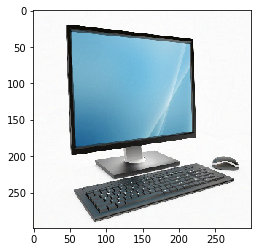

In [41]:
plt.imshow(adv1[0].astype(np.uint8))
plt.show()

In [42]:
from PIL import Image
im = Image.fromarray(adv1[0].astype(np.uint8))
im.save("./Hacked.png")